In [1]:
from utils import *
import numpy as np
import warnings
from sklearn.preprocessing import OneHotEncoder

/Users/user/opt/anaconda3/envs/capstone/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/Users/user/opt/anaconda3/envs/capstone/lib/python3.7/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [2]:
warnings.filterwarnings(action='ignore') 

In [3]:
PROJECT_DIR = get_upper_dir()
DATA_DIR = get_data_dir(PROJECT_DIR)
FEATURE_DIR = get_feature_dir(PROJECT_DIR)

In [4]:
gender_labels_np = np.load(FEATURE_DIR + 'gender_age/label2.npy')

In [119]:
labels_np = np.load(FEATURE_DIR + 'direction/' + 'label2.npy')

In [120]:
enc = OneHotEncoder()
enc.fit(labels_np.reshape(-1, 1))
labels = enc.transform(labels_np.reshape(-1,1)).toarray()

In [5]:
gender_enc = OneHotEncoder()
gender_enc.fit(gender_labels_np.reshape(-1, 1))
gender_labels = gender_enc.transform(gender_labels_np.reshape(-1,1)).toarray()

In [121]:
features = np.load(FEATURE_DIR + 'direction/feature2.npy')

In [7]:
gender_features = np.load(FEATURE_DIR + 'gender_age/feature2.npy')

In [154]:
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LeakyReLU, Input, Softmax, Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, Concatenate
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
import tensorflow as tf

from sklearn.model_selection import KFold

import numpy as np
import matplotlib.pyplot as plt

In [9]:
from random import shuffle

In [10]:
def shuffle_data(xFeed, yFeed):
    # 셔플
    xFeed_shuf = []
    yFeed_shuf = []
    index_shuf = list(range(len(xFeed)))
    shuffle(index_shuf)
    # one more shuffle
    shuffle(index_shuf)
    for i in index_shuf:
        xFeed_shuf.append(xFeed[i])
        yFeed_shuf.append(yFeed[i])
    return xFeed_shuf, yFeed_shuf

In [12]:
gender_features, gender_labels = shuffle_data(gender_features, gender_labels)

In [15]:
train_data = gender_features[:2880]
train_label = gender_labels[:2880]
test_data = gender_features[2880:]
test_label = gender_labels[2880:]

In [122]:
train_data = features[:1440]
train_label = labels[:1440]
test_data = features[1440:]
test_label = labels[1440:]

In [156]:
input = Input(shape = (120, 150, 1))

lrelu = LeakyReLU(alpha=0.1)
x = Conv2D(32, kernel_size=5, activation=lrelu)(input)


s1 = Conv2D(50, kernel_size=3, activation='relu')(x)
s1 = MaxPooling2D(pool_size = (3,3), strides=(2,2))(s1)
s2 = Conv2D(50, kernel_size=1, activation='relu')(x)
s2 = MaxPooling2D(pool_size = (5,5), strides=(2,2))(s2)
s3 = Conv2D(50, kernel_size=5, activation='relu')(x)
s3 = MaxPooling2D(pool_size = (1,1), strides=(2,2))(s3)
s_output = tf.concat([s1, s2, s3], 1)

x = Conv2D(32, kernel_size=1, activation=lrelu)(s_output)
x = MaxPooling2D(pool_size = (5,5), strides=(2,2))(x)
x = Conv2D(32, kernel_size =5, activation=lrelu)(x)
x = MaxPooling2D(pool_size = (1,1), strides=(2,2))(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(500)(x)
x = lrelu(x)
x = Dropout(0.25)(x)
x = Dense(6)(x)
y = Softmax()(x)
model = Model(inputs=input, outputs=y)

In [157]:
model.compile(loss = "categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

In [123]:
train_data = np.array(train_data)
test_data = np.array(test_data)

In [124]:
train_data = np.array(train_data)
train_data = train_data[:, :, :,np.newaxis,]
test_data = np.array(test_data)
test_data = test_data[:, :, :,np.newaxis,]
train_data.shape

(1440, 120, 150, 1)

In [160]:
history = model.fit(train_data, train_label, batch_size=32, epochs=70, verbose=1, validation_split=0.2)

Train on 1152 samples, validate on 288 samples
Epoch 1/70
  32/1152 [..............................] - ETA: 1:44

AbortedError:  Operation received an exception:Status: 5, message: could not create a view primitive descriptor, in file tensorflow/core/kernels/mkl_slice_op.cc:433
	 [[node Slice_1 (defined at /Users/user/opt/anaconda3/envs/capstone/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:1751) ]] [Op:__inference_distributed_function_18668]

Function call stack:
distributed_function


In [108]:
len(train_data[0])

44

In [43]:
class LeNet : 
    @staticmethod
    def build(input_shape, classes):
        model = Sequential()
        model.add(Conv2D(32, kernel_size = 5, padding="same", input_shape=input_shape))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Conv2D(50, kernel_size = 5, padding="same"))
        model.add(Activation("relu"))
        model.add(Dropout(0.25))
        model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))
        model.add(Dropout(0.5))
        model.add(Dense(6))
        model.add(Activation("softmax"))
        return model

In [27]:
train_data = np.array(train_data)
train_data = train_data[:, :, :,np.newaxis,]
test_data = np.array(test_data)
test_data = test_data[:, :, :,np.newaxis,]

In [28]:
train_label = np.array(train_label)
test_label = np.array(test_label)

In [44]:
model = LeNet.build(input_shape = (120, 150, 1), classes = 6)

In [45]:
model.compile(loss = "categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

In [46]:
history = model.fit(train_data, train_label, batch_size=256, epochs=70, verbose=1, validation_split=0.2)

Train on 1152 samples, validate on 288 samples
Epoch 1/70
1152/1152 [==============================] - 76s 66ms/step - loss: 26.3207 - accuracy: 0.2778 - val_loss: 2.6237 - val_accuracy: 0.3715
Epoch 2/70
1152/1152 [==============================] - 68s 59ms/step - loss: 1.9331 - accuracy: 0.4010 - val_loss: 1.5722 - val_accuracy: 0.3160
Epoch 3/70
1152/1152 [==============================] - 67s 58ms/step - loss: 1.6432 - accuracy: 0.3733 - val_loss: 1.6544 - val_accuracy: 0.3368
Epoch 4/70
1152/1152 [==============================] - 65s 57ms/step - loss: 1.5273 - accuracy: 0.3620 - val_loss: 1.3009 - val_accuracy: 0.3090
Epoch 5/70
1152/1152 [==============================] - 66s 57ms/step - loss: 1.2085 - accuracy: 0.4089 - val_loss: 0.9954 - val_accuracy: 0.5312
Epoch 6/70
1152/1152 [==============================] - 65s 56ms/step - loss: 0.8874 - accuracy: 0.6172 - val_loss: 0.7518 - val_accuracy: 0.6285
Epoch 7/70
1152/1152 [==============================] - 66s 57ms/step - loss

In [33]:
score = model.evaluate(test_data, test_label, verbose=1)
print("최종 정확도 : " + str( score[1] * 100 ) + " %" )

360/360 [==============================] - 7s 20ms/step
최종 정확도 : 73.88888597488403 %


In [40]:
score = model.evaluate(test_data, test_label, verbose=1)
print("최종 정확도 : " + str( score[1] * 100 ) + " %" )

360/360 [==============================] - 7s 20ms/step
최종 정확도 : 78.88888716697693 %


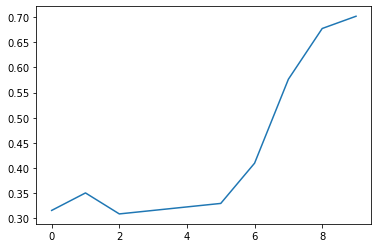

In [35]:
plt.plot(history.history['val_accuracy'])

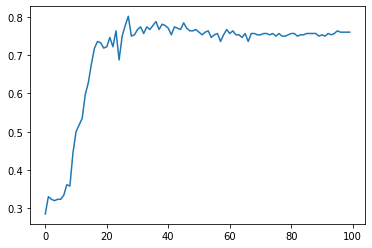

In [41]:
plt.plot(history.history['val_accuracy'])

In [52]:
skf = KFold(n_splits=5, shuffle=True)

accuracy = []

for t, v in skf.split(train_data, train_label):
    model = LeNet.build(input_shape = (120, 150, 1), classes = 6)
    model.compile(loss = "categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])
    
    history = model.fit(train_data[t], train_label[t], batch_size=128, epochs=70, verbose=1)

    k_accuracy = '%.4f' % (model.evaluate(train_data[v], train_label[v])[1])
    accuracy.append(k_accuracy)

# 전체 검증 결과 출력
print('\nK-fold cross validation Accuracy: {}'.format(accuracy))

Epoch 1/70
1152/1152 [==============================] - 59s 51ms/step - loss: 16.9020 - accuracy: 0.3116
Epoch 2/70
1152/1152 [==============================] - 57s 50ms/step - loss: 1.4089 - accuracy: 0.3776
Epoch 3/70
1152/1152 [==============================] - 56s 49ms/step - loss: 1.2639 - accuracy: 0.3646
Epoch 4/70
1152/1152 [==============================] - 56s 49ms/step - loss: 1.1093 - accuracy: 0.4670
Epoch 5/70
1152/1152 [==============================] - 59s 51ms/step - loss: 0.8712 - accuracy: 0.6285
Epoch 6/70
1152/1152 [==============================] - 57s 50ms/step - loss: 0.6662 - accuracy: 0.7118
Epoch 7/70
1152/1152 [==============================] - 56s 49ms/step - loss: 0.6245 - accuracy: 0.6979
Epoch 8/70
1152/1152 [==============================] - 56s 49ms/step - loss: 0.5302 - accuracy: 0.7526
Epoch 9/70
1152/1152 [==============================] - 57s 49ms/step - loss: 0.4407 - accuracy: 0.8021
Epoch 10/70
1152/1152 [==============================] - 57s 49